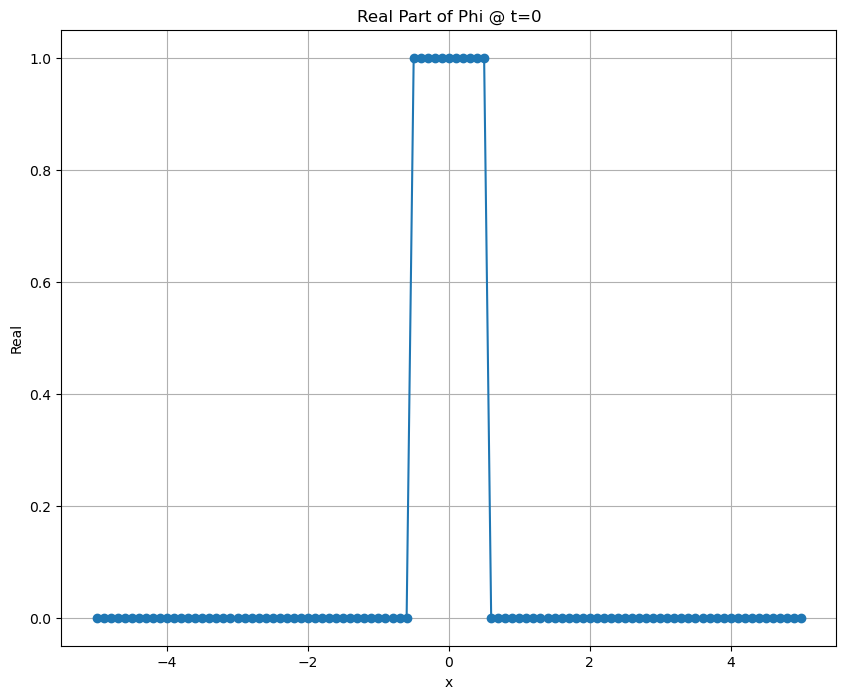

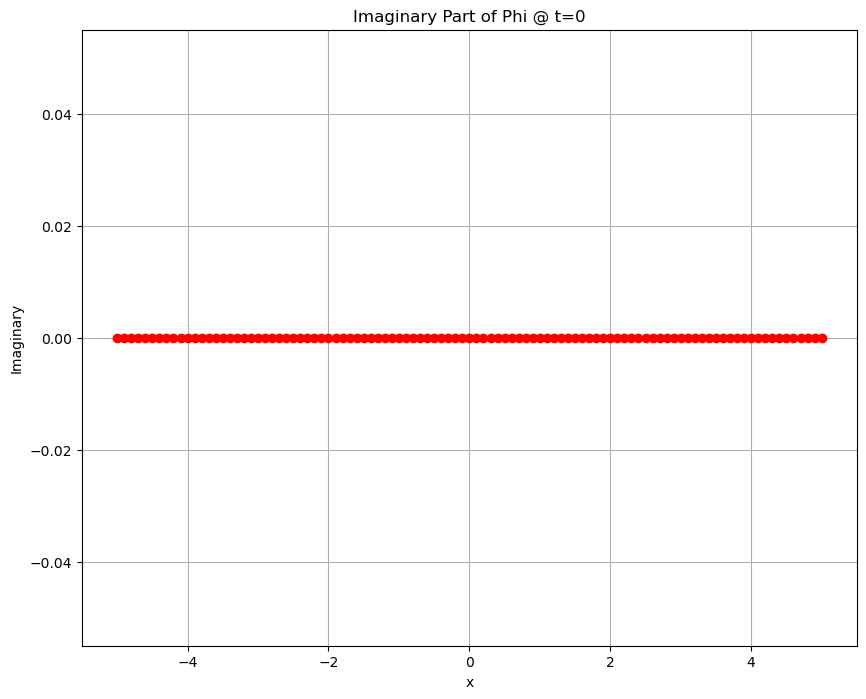

In [16]:
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = -5, 5 # x boundary
t_max = 0 # total time
a = 0.1  # discrete space
delta = 0.01  # discrete time
nx = int((x_max - x_min) / a) + 1  # number of slides
nt = int(t_max / delta) + 1  # number of time steps

# initial condition 
phi = np.zeros((nt, nx), dtype=np.complex_)
for n in range(nx):
    x = x_min + n * a
    if -0.5 <= x <= 0.5:
        phi[0][n] = 1

# 1D Schrodinger
def schrodinger(phi, t_i):
    dphi = np.zeros(nx, dtype=np.complex_)
    for n in range(1, nx - 1):
        x = x_min + n * a
        V = 0.5 * x**2 # for m=w=h=1
        d2phi_dx2 = (phi[n+1] - 2*phi[n] + phi[n-1]) / a**2
        dphi[n] = -0.5j * d2phi_dx2 + V * phi[n]
    return dphi

# 4th Runge Kutta
def rk4_step(phi, delta, t_i):
    phi_t = phi[t_i]
    k1 = schrodinger(phi_t, t_i)
    k2 = schrodinger(phi_t + 0.5 * delta * k1, t_i)
    k3 = schrodinger(phi_t + 0.5 * delta * k2, t_i)
    k4 = schrodinger(phi_t + delta * k3, t_i)
    
    phi[t_i + 1] = phi_t + delta / 6.0 * (k1 + 2*k2 + 2*k3 + k4)
    return phi

for t in range(nt - 1): # nt - 1 because phi[t+1] is updated
    phi = rk4_step(phi, delta, t)

# for plot
x_values = [x_min + n * a for n in range(nx)]
phi_real = [p.real for p in phi[-1]]
phi_imag = [p.imag for p in phi[-1]]

# real
plt.figure(figsize=(10, 8))
plt.plot(x_values, phi_real, marker='o')
plt.title('Real Part of Phi @ t=0')
plt.xlabel('x')
plt.ylabel('Real')
plt.grid(True)

# imaginary
plt.figure(figsize=(10, 8))
plt.plot(x_values, phi_imag, marker='o', color='red')
plt.title('Imaginary Part of Phi @ t=0')
plt.xlabel('x')
plt.ylabel('Imaginary')
plt.grid(True)

plt.show()


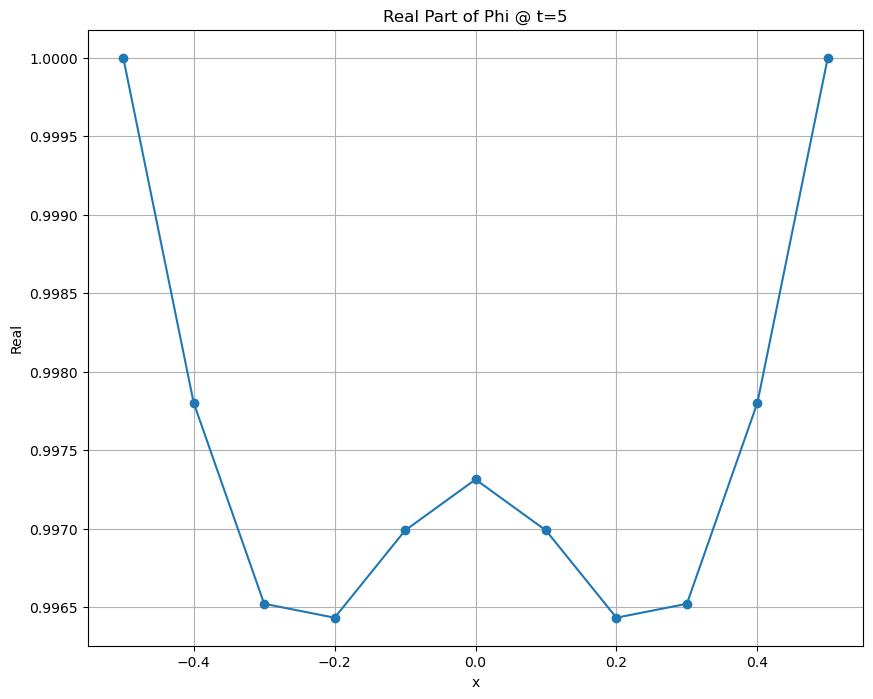

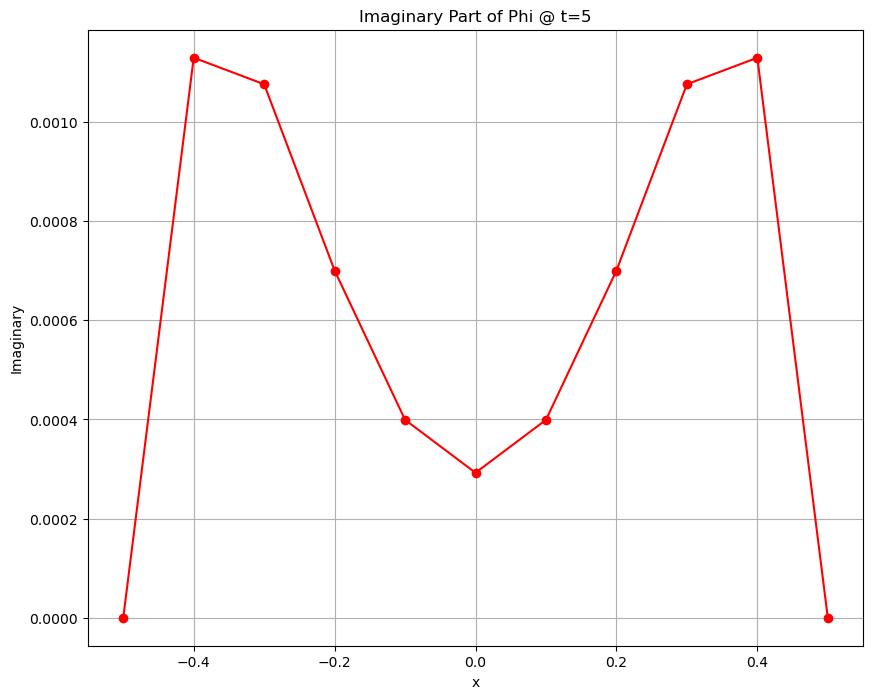

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x_min, x_max = -0.5, 0.5 # x boundary
t_max = 5 # total time
a = 0.1  # discrete space
delta = 0.01  # discrete time
nx = int((x_max - x_min) / a) + 1  # number of slides
nt = int(t_max / delta) + 1  # number of time steps

# initial condition
phi = np.zeros((nt, nx), dtype=np.complex_) 
for n in range(nx):
    x = x_min + n * a
    if -0.5 <= x <= 0.5:
        phi[0][n] = 1
        
# 1D Schrodinger
def schrodinger(phi, t_i):
    dphi = np.zeros(nx, dtype=np.complex_)
    for n in range(1, nx - 1):
        x = x_min + n * a
        V = 0.5 * x**2 # for m=w=h=1
        d2phi_dx2 = (phi[n+1] - 2*phi[n] + phi[n-1]) / a**2
        dphi[n] = -0.5j * d2phi_dx2 + V * phi[n]
    return dphi

# 4th Runge Kutta
def rk4_step(phi, delta, t_i):
    phi_t = phi[t_i]
    k1 = schrodinger(phi_t, t_i)
    k2 = schrodinger(phi_t + 0.5 * delta * k1, t_i)
    k3 = schrodinger(phi_t + 0.5 * delta * k2, t_i)
    k4 = schrodinger(phi_t + delta * k3, t_i)
    
    phi[t_i + 1] = phi_t + delta / 6.0 * (k1 + 2*k2 + 2*k3 + k4)
    return phi

for t in range(nt-1): # nt - 1 because phi[t+1] is updated
    phi = rk4_step(phi, delta, t) 

# for plot
x_values = [x_min + n * a for n in range(nx)]
phi_real = [p.real for p in phi[-1]]
phi_imag = [p.imag for p in phi[-1]]

# Real
plt.figure(figsize=(10, 8))
plt.plot(x_values, phi_real, marker='o')
plt.title('Real Part of Phi @ t=5')
plt.xlabel('x')
plt.ylabel('Real')
plt.grid(True)

# Imaginary
plt.figure(figsize=(10, 8))
plt.plot(x_values, phi_imag, marker='o', color='red')
plt.title('Imaginary Part of Phi @ t=5')
plt.xlabel('x')
plt.ylabel('Imaginary')
plt.grid(True)

plt.show()